## Load drug data with selected columns and good memory usage

**Workflow**

1. Load the data
2. Clean it:
    * get rid of missing values
    * change column names
    * change dtypes for better memory use
3. Analyze it

**Data description**

Outpatient prescription drugs paid for by state medicaid agencies.

**Notes**

* U.S. population: 325 million.
* 70 million people are on medicaid, that's just over 1/5th of the population.
* 40 million are on medicare.
* 8% of people are not insured.
* 37.7% are on government healthcare, 67% are on private health coverage.
* Out of private, employer based accounts for 56%.


**Sources**

- https://www.census.gov/library/publications/2018/demo/p60-264.html
- https://data.medicaid.gov/State-Drug-Utilization/State-Drug-Utilization-Data-2017/3v5r-x5x9


In [136]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
# Check available features

df2008 = pd.read_csv('State_Drug_Utilization_Data_2008.csv', low_memory=False)
df2008.sample()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Units Reimbursed,Suppression Used,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
31482,FFSU,TX,93,7304,65,2008,1,MIRTAZAPIN,1501.0,False,32.0,3318.06,3318.06,0.0,1/1,01/01/2008,31.106,-97.6475,"(31.106, -97.6475)",00093730465


In [161]:
# Load state drug data for 2008 - 2018

columns = ['State', 'Year', 'Product Name', 'Quarter', 'Number of Prescriptions']
filenames = ['State_Drug_Utilization_Data_' + str(i) + '.csv' for i in range(2008, 2019)]

df = pd.concat(pd.read_csv(filename, usecols=columns) 
               for filename in filenames)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39752112 entries, 0 to 2365964
Data columns (total 5 columns):
State                      object
Year                       int64
Quarter                    int64
Product Name               object
Number of Prescriptions    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ GB


In [163]:
df.sample(5)

,State,Year,Quarter,Product Name,Number of Prescriptions
1394159,ME,2012,4,HEPARIN SO,NaN
876955,MD,2009,3,FUROSEMIDE,NaN
1522222,MA,2018,1,DOXYCYCLIN,183.0
4034705,MS,2016,4,GUAIFENESI,NaN
1325853,MD,2015,4,CLARITHROM,151.0


In [164]:
# Convert non-numeric columns to category to save memory

df[['State', 'Product Name', 'Quarter', 
    'Number of Prescriptions']] = df[['State','Product Name', 
                                      'Quarter','Number of Prescriptions']].astype('category')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39752112 entries, 0 to 2365964
Data columns (total 5 columns):
State                      category
Year                       int64
Quarter                    category
Product Name               category
Number of Prescriptions    category
dtypes: category(4), int64(1)
memory usage: 990.2 MB


In [176]:
df.describe(include='all')

,State,Year,Quarter,Product Name,Number of Prescriptions
count,39742947,3.974295e+07,39742947.0,39742947,19525887.0
unique,52,NaN,4.0,32846,62371.0
top,XX,NaN,2.0,LISINOPRIL,15.0
freq,2388838,NaN,10529308.0,460165,362038.0
mean,NaN,2.013430e+03,NaN,NaN,NaN
std,NaN,2.884924e+00,NaN,NaN,NaN
min,NaN,2.008000e+03,NaN,NaN,NaN
25%,NaN,2.011000e+03,NaN,NaN,NaN
50%,NaN,2.014000e+03,NaN,NaN,NaN
75%,NaN,2.016000e+03,NaN,NaN,NaN


In [141]:
# TODO:
# 2. Do some frequency count plots
# 3. See which states use which drugs
# 4. Come up with some more questions

## Take care of the missing values in Product Name

In [166]:
# We have 3311 ?'s and 5854 NaNs

print((df['Product Name'] == '?').sum())
print(df.isna().sum())

# Replace ? with nan

df = df.replace('?', np.NaN)

3311
State                             0
Year                              0
Quarter                           0
Product Name                   5854
Number of Prescriptions    20225364
dtype: int64


In [169]:
df.isna().sum()

State                             0
Year                              0
Quarter                           0
Product Name                   9165
Number of Prescriptions    20225364
dtype: int64

In [170]:
# Just drop the nans, there aren't very many of them

df = df.dropna(subset=['Product Name'])
df.isna().sum()

State                             0
Year                              0
Quarter                           0
Product Name                      0
Number of Prescriptions    20217060
dtype: int64


## What drugs are people on and why are they on them?

This dataset will let us see the types of drugs people are taking in the U.S. by state, year, and time of year.

In [171]:
# Pearson correlation only shows numeric

df.corr()

,Year
Year,1.0


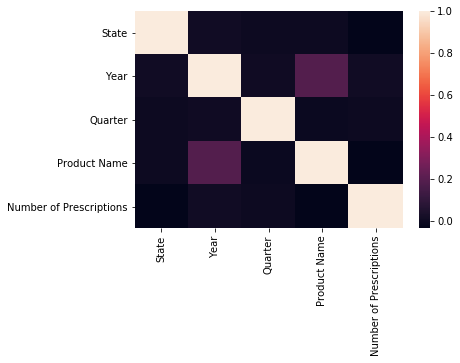

In [172]:
# Factorize into numbers for non-numeric correlations

sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr());

In [181]:
# XX are aggregated entries, remove them

df = df[df.State != 'XX']

In [203]:
df.sort_values(by='Number of Prescriptions', ascending=False).head(5)

,State,Year,Quarter,Product Name,Number of Prescriptions
1330804,CA,2018,1,VENTOLIN H,472466.0
4700770,CA,2017,4,VENTOLIN H,452749.0
4478001,CA,2017,1,VENTOLIN H,449214.0
122514,NY,2016,1,VENTOLIN H,418169.0
4241986,CA,2017,2,VENTOLIN H,412633.0
